# 4.5 統計モデルの設計

In [2]:
using Distributions
using PyPlot

In [8]:
function set_options(ax, xlabel, ylabel, title;
                     grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
    return
end

set_options (generic function with 1 method)

## 4.5.1 対数正規分布

In [4]:
μ = 0.0
σ = 1.0
d = Normal(μ, σ)
X = rand(d, 100)
Y = exp.(X)
Y'

1×100 adjoint(::Vector{Float64}) with eltype Float64:
 7.50885  2.24097  0.946835  0.604899  2.13181  …  0.728845  1.09442  1.13501

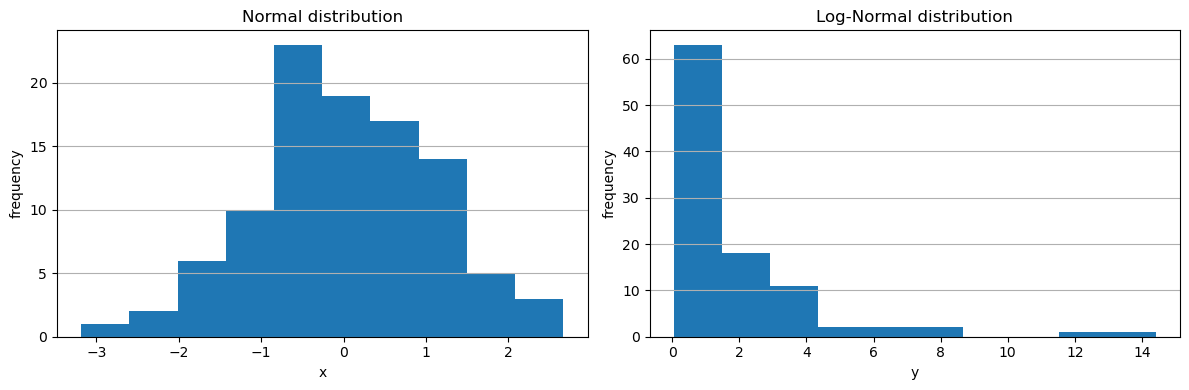

In [5]:
fig, axes = subplots(1, 2, figsize=(12, 4))
axes[1].hist(X)
set_options(axes[1], "x", "frequency", "Normal distribution"; gridy=true)
axes[2].hist(Y)
set_options(axes[2], "y", "frequency", "Log-Normal distribution"; gridy=true)
tight_layout()

In [6]:
d = LogNormal(μ, σ)
X = rand(d, 100)
X'

1×100 adjoint(::Vector{Float64}) with eltype Float64:
 1.07923  1.40118  0.378849  0.821833  …  1.45162  0.482086  1.69789  1.69131

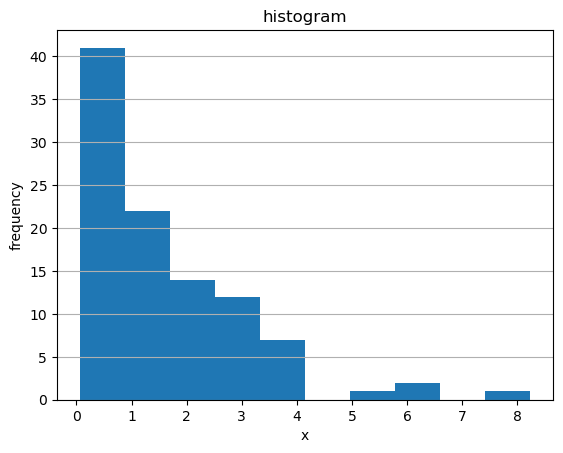

In [9]:
fig, ax = subplots()
ax.hist(X)
set_options(ax, "x", "frequency", "histogram", gridy=true)

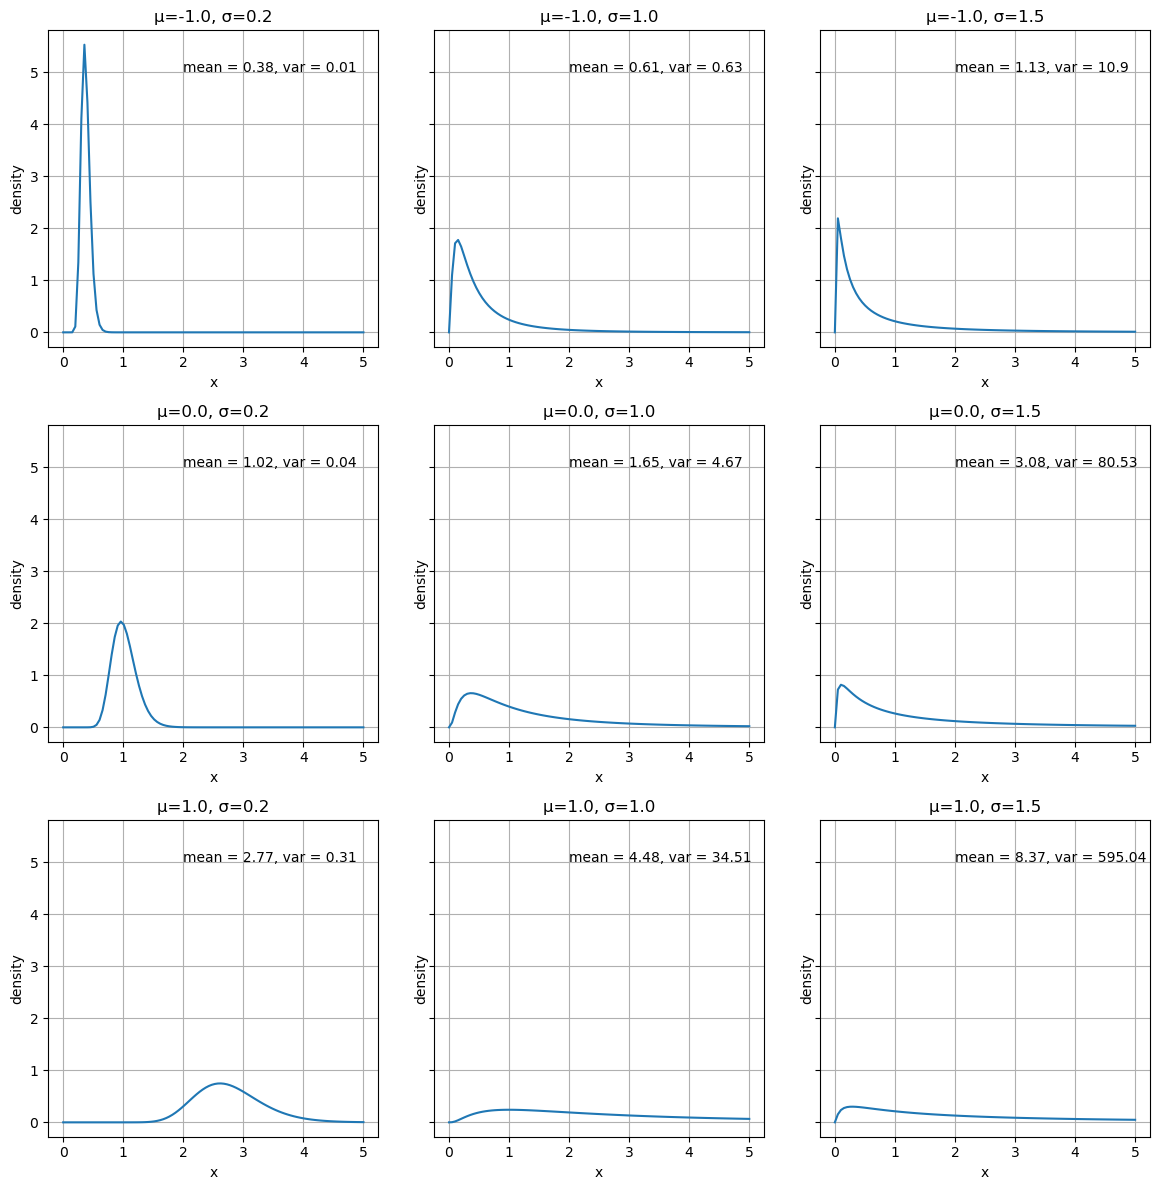

In [10]:
xs = range(0, 5, length=100)
μs = [-1.0, 0.0, 1.0]
σs = [0.2, 1.0, 1.5]

fig, axes = subplots(length(μs), length(σs), sharey=true, figsize=(12,12))
for (i, μ) in enumerate(μs)
    for (j, σ) in enumerate(σs)
        d = LogNormal(μ, σ)
        axes[i,j].plot(xs, pdf.(d, xs))
        m = round(mean(d), digits=2)
        v = round(var(d), digits=2)
        axes[i,j].text(2, 5, "mean = $(m), var = $(v)")
        set_options(axes[i,j], "x", "density", "μ=$(μ), σ=$(σ)")
    end
end
tight_layout()